<a href="https://colab.research.google.com/github/ngwalker93/ADS-504-Final-Team-Project/blob/nwalker/ADS_504FinalProj_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 504 Final Team Project
# Weight Lifting Exercises monitored with Inertial Measurement Units

### Team 6: Kiara Paz, Jordan Torres, and Nancy Walker

## Introduction
 This project aims to assess the application of machine learning methods and programming techniques.

## Dataset Discription
Weight Lifting Exercises monitored with Inertial Measurement Units: https://archive.ics.uci.edu/dataset/273/weight+lifting+exercises+monitored+with+inertial+measurement+units

The data set was sourced from the UC Irvine Machine Learning Repository. It contains observations of six healthy subjects that performed 5 variations of the bicep curl weight lifting exercise. A health care professional predicted one of the varaitions.

## Problem Definition


## Import Libraries and Dataset

In [96]:
# Import Libaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import scipy.stats as st
from scipy import stats
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Attach GitHub repository to retrieve dataset
!git clone https://github.com/ngwalker93/ADS-504-Final-Team-Project.git

Cloning into 'ADS-504-Final-Team-Project'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 51 (delta 26), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 1.89 MiB | 3.71 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [3]:
# Check that repository was added
!ls ADS-504-Final-Team-Project

ADS_504FinalProj.ipynb
Example_WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv
README.md


In [4]:
# Read .csv file
df = pd.read_csv('ADS-504-Final-Team-Project/Example_WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv', skiprows=1, delimiter=',')
df.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,E
2,eurico,1322489729,70653,28/11/2011 14:15,no,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,E
3,eurico,1322489729,82654,28/11/2011 14:15,no,1,3.56,44.4,-82.1,1,...,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,E
4,eurico,1322489729,90637,28/11/2011 14:15,no,1,3.57,45.1,-81.9,1,...,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,E


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Columns: 159 entries, user_name to classe
dtypes: float64(103), int64(31), object(25)
memory usage: 4.9+ MB


## Exploratory Data Analysis (EDA)

In [6]:
# Get the count of null values for each column
null_counts = df.isnull().sum()

# Display the null counts
display(null_counts[null_counts > 0]) # Display only columns with null values

,0
kurtosis_roll_belt,3936
kurtosis_picth_belt,3936
kurtosis_yaw_belt,3936
skewness_roll_belt,3936
skewness_roll_belt.1,3936
...,...
stddev_pitch_forearm,3936
var_pitch_forearm,3936
avg_yaw_forearm,3936
stddev_yaw_forearm,3936


Given that 100 columns have a large number of null values (3936 out of 4024 rows), dropping columns might be a reasonable approach if those specific features are not crucial for analysis. Alternatively, imputation can be consider, but with such a high percentage of missing values, imputation might not be the best option unless there is a strong reason to keep these columns.

Theses column appear to be the columns that contain statisitcal caculations. "Each IMU has x, y, and z values + euler angles (roll, pitch and yaw). For each time window (1s of data), there are several statistics calculations, like Kurtosis, Variance, etc."

In [7]:
# Get the names of columns with null values
cols_to_drop = null_counts[null_counts > 0].index

# Drop the columns with null values
df_dropped = df.drop(columns=cols_to_drop)

# Display the first few rows and the columns and their data types of the new DataFrame
df_dropped.head()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_name             4024 non-null   object 
 1   raw_timestamp_part_1  4024 non-null   int64  
 2   raw_timestamp_part_2  4024 non-null   int64  
 3   cvtd_timestamp        4024 non-null   object 
 4   new_window            4024 non-null   object 
 5   num_window            4024 non-null   int64  
 6   roll_belt             4024 non-null   float64
 7   pitch_belt            4024 non-null   float64
 8   yaw_belt              4024 non-null   float64
 9   total_accel_belt      4024 non-null   int64  
 10  gyros_belt_x          4024 non-null   float64
 11  gyros_belt_y          4024 non-null   float64
 12  gyros_belt_z          4024 non-null   float64
 13  accel_belt_x          4024 non-null   int64  
 14  accel_belt_y          4024 non-null   int64  
 15  accel_belt_z         

In [8]:
#Check unique values
df['classe'].unique()

array(['E', 'A', 'D', 'B', 'C'], dtype=object)

Used ChatGPT to figure out what variable represnets the dependent variable.

OpenAI. (2025a). ChatGPT (July 22 version) [Large language model]. https://chatgpt.com/share/688008be-b13c-800f-8777-77f32c0befe7

The dependent variable (target variable) is classe. Exercise class (A, B, C, D, or E) that a healthcare professional predicted. These are the the variables to predict using the other columns. All other columns (except user_name, timestamps, and IDs) are independent variables (features) used to model or predict.

Drop user_name, raw_timestamp_part_1, raw_timestamp_part_2, cvtd_timestamp, new_window, and num_window because they are not predictive features and don’t carry meaningful information about the exercise type (classe) for a machine learning model.

Timestamps doesn't have a causal relationship with the type of exercise performed they only show the timestamp of when the excercise was taken.

new_window is a categorical flag indicating whether a new window of measurements started (yes or no).

num_window is a a counter for windowed observation. It shows how the dataset was created, not a variable related to the actual exercise performance.

In [9]:
# Drop the columns that are not needed for modeling and predicting
df_dropped = df_dropped.drop(columns=['user_name', 'raw_timestamp_part_1',
                                      'raw_timestamp_part_2','cvtd_timestamp',
                                      'new_window', 'num_window'])

# Display the first few rows and the columns and their data types of the new DataFrame
df_dropped.head()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   roll_belt             4024 non-null   float64
 1   pitch_belt            4024 non-null   float64
 2   yaw_belt              4024 non-null   float64
 3   total_accel_belt      4024 non-null   int64  
 4   gyros_belt_x          4024 non-null   float64
 5   gyros_belt_y          4024 non-null   float64
 6   gyros_belt_z          4024 non-null   float64
 7   accel_belt_x          4024 non-null   int64  
 8   accel_belt_y          4024 non-null   int64  
 9   accel_belt_z          4024 non-null   int64  
 10  magnet_belt_x         4024 non-null   int64  
 11  magnet_belt_y         4024 non-null   int64  
 12  magnet_belt_z         4024 non-null   int64  
 13  roll_arm              4024 non-null   float64
 14  pitch_arm             4024 non-null   float64
 15  yaw_arm              

In [10]:
df_dropped.shape

(4024, 53)

In [11]:
#Get the value counts for classe
df_dropped_counts = df_dropped['classe'].value_counts()
df_dropped_counts

,count
classe,
E,1370
A,1365
B,901
D,276
C,112


Text(0, 0.5, 'Count')

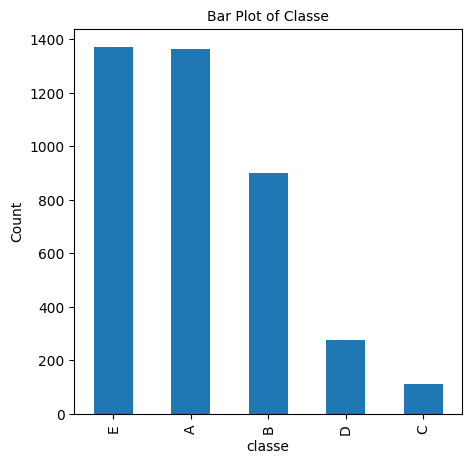

In [12]:
# Plot the value counts
plt.figure(figsize=(5,5))
df_dropped_counts.plot(kind='bar')
plt.title("Bar Plot of Classe", fontsize=10)
plt.ylabel("Count")

The dependent variable of this dataset has five categories. These categories are also unbalances. There is a much higher count of classe E (1370) and A (1365) compared to classe D (276) and C (112). Classe B is in between with a count of 901.  

**Questions**
What is the best way to go about balancing these categories? Should one classe be chosen against the others for model predictions?  

ChatGPT answer

OpenAI. (2025c). ChatGPT (July 24 version) [Large language model].https://chatgpt.com/share/6882432c-5d68-800f-bca2-ea2076338187

If the problem can be reframed as a binary classification task then a "one-vs-all" approach where the model predicts C vs. Not-C can be considered. However, if all classes are important the multi-class setup should be retained. Since Classe B, C, and D are not negligible, it may be ideal to retain all 5 classes and handle imbalance via resampling (i.e. libarary imblearn, function SMOTE) or class weighting. Evaluate performance using macro-averaged metrics, because accuracy will be biased toward A and E.

  *Good model choices that handle multiclassification and class imbalance*:

    Tree-based models:

      Random Forest (class_weight="balanced")

      Gradient Boosting (XGBoost, LightGBM, CatBoost)

    Logistic Regression (Multinomial)

    Support Vector Machines (SVM) with a one-vs-one or one-vs-rest strategy (class_weight="balanced")

    Neural Networks

In [13]:
#get data discriptive statistics
df_dropped.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,...,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,73.308342,14.158009,-30.974709,12.767644,-0.182284,-0.008837,-0.246446,-24.362823,39.843688,-94.726143,...,34.375000,0.107614,-0.004108,0.093022,-6.444583,171.466203,-162.968936,-348.663767,358.638668,475.231113
std,62.207339,18.766999,64.663731,8.193013,0.318171,0.057817,0.289511,25.528431,33.001362,95.787395,...,6.708725,0.540884,2.267832,0.735418,133.487861,193.468617,80.826582,265.421967,520.255942,293.009818
min,-28.900000,-56.200000,-179.000000,0.000000,-0.790000,-0.470000,-0.770000,-120.000000,-71.000000,-244.000000,...,10.000000,-1.880000,-5.730000,-2.580000,-328.000000,-467.000000,-366.000000,-1160.000000,-725.000000,-876.000000
25%,1.380000,6.220000,-93.100000,3.000000,-0.430000,-0.030000,-0.460000,-42.000000,4.000000,-176.000000,...,30.000000,-0.140000,-1.780000,-0.310000,-117.000000,75.750000,-210.000000,-589.000000,-76.000000,370.750000
50%,122.000000,25.500000,-4.940000,19.000000,-0.240000,-0.020000,-0.410000,-34.000000,65.000000,-166.000000,...,35.000000,0.060000,-0.020000,-0.020000,-6.000000,229.500000,-181.000000,-330.500000,653.000000,560.000000
75%,124.000000,26.400000,-2.695000,20.000000,0.020000,0.000000,-0.020000,-16.000000,70.000000,20.000000,...,37.000000,0.420000,1.830000,0.480000,113.000000,297.000000,-150.000000,-152.000000,747.000000,670.000000
max,159.000000,60.300000,179.000000,26.000000,2.020000,0.420000,0.820000,80.000000,164.000000,77.000000,...,59.000000,1.810000,5.170000,3.350000,279.000000,575.000000,239.000000,413.000000,1440.000000,1040.000000


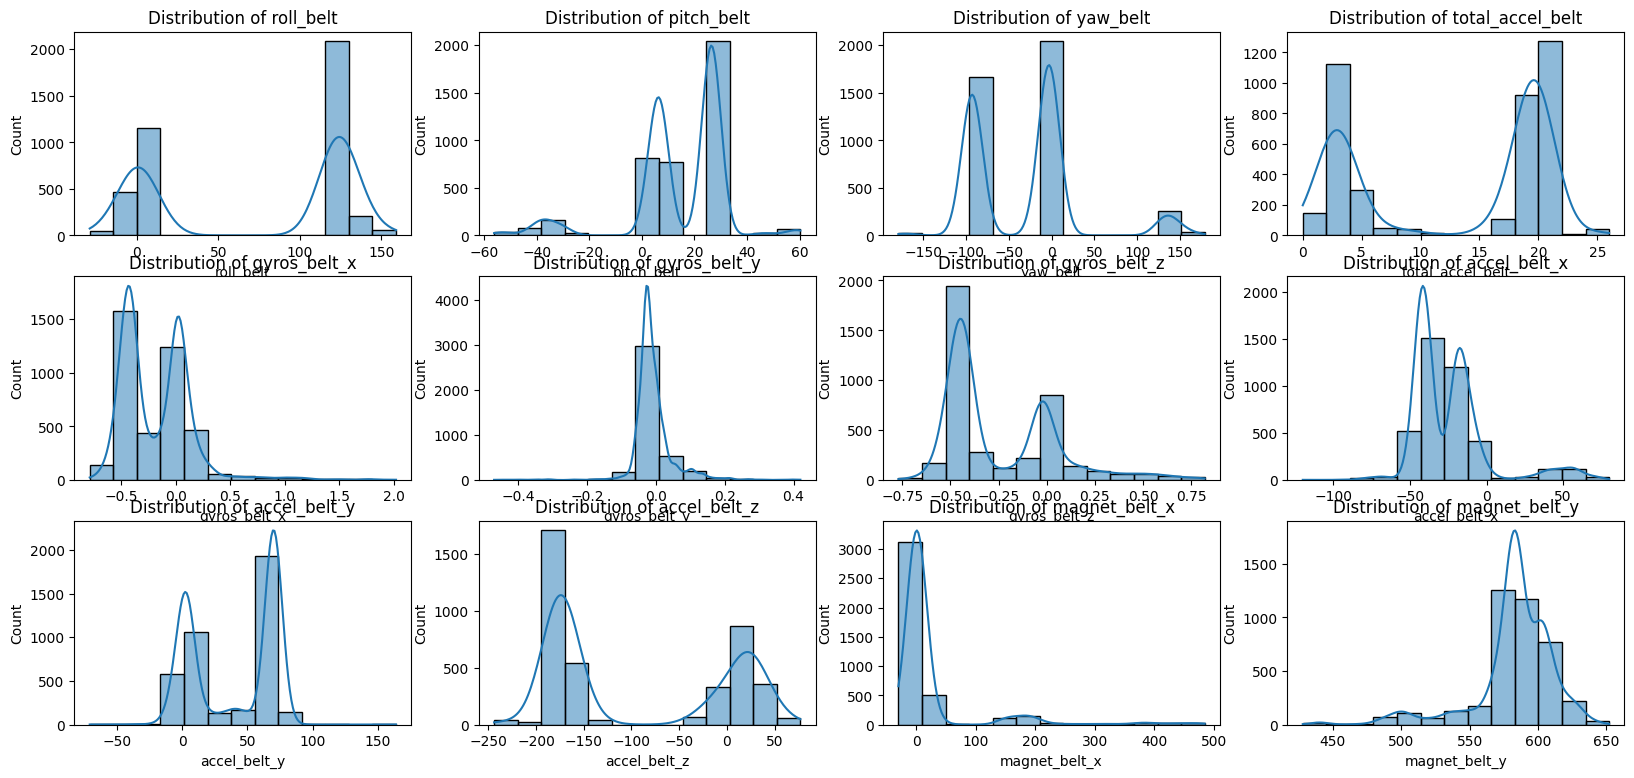

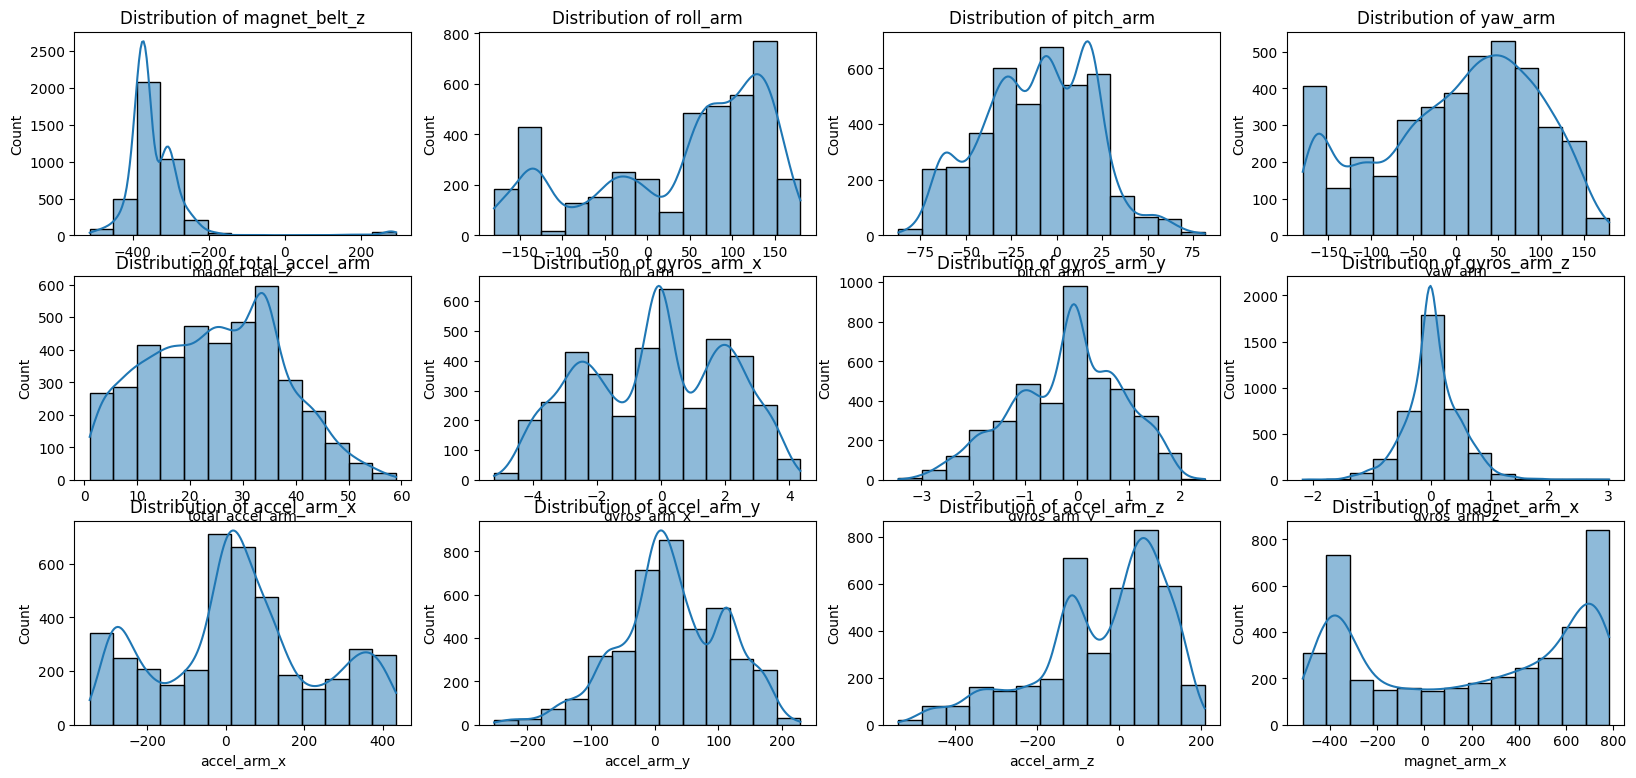

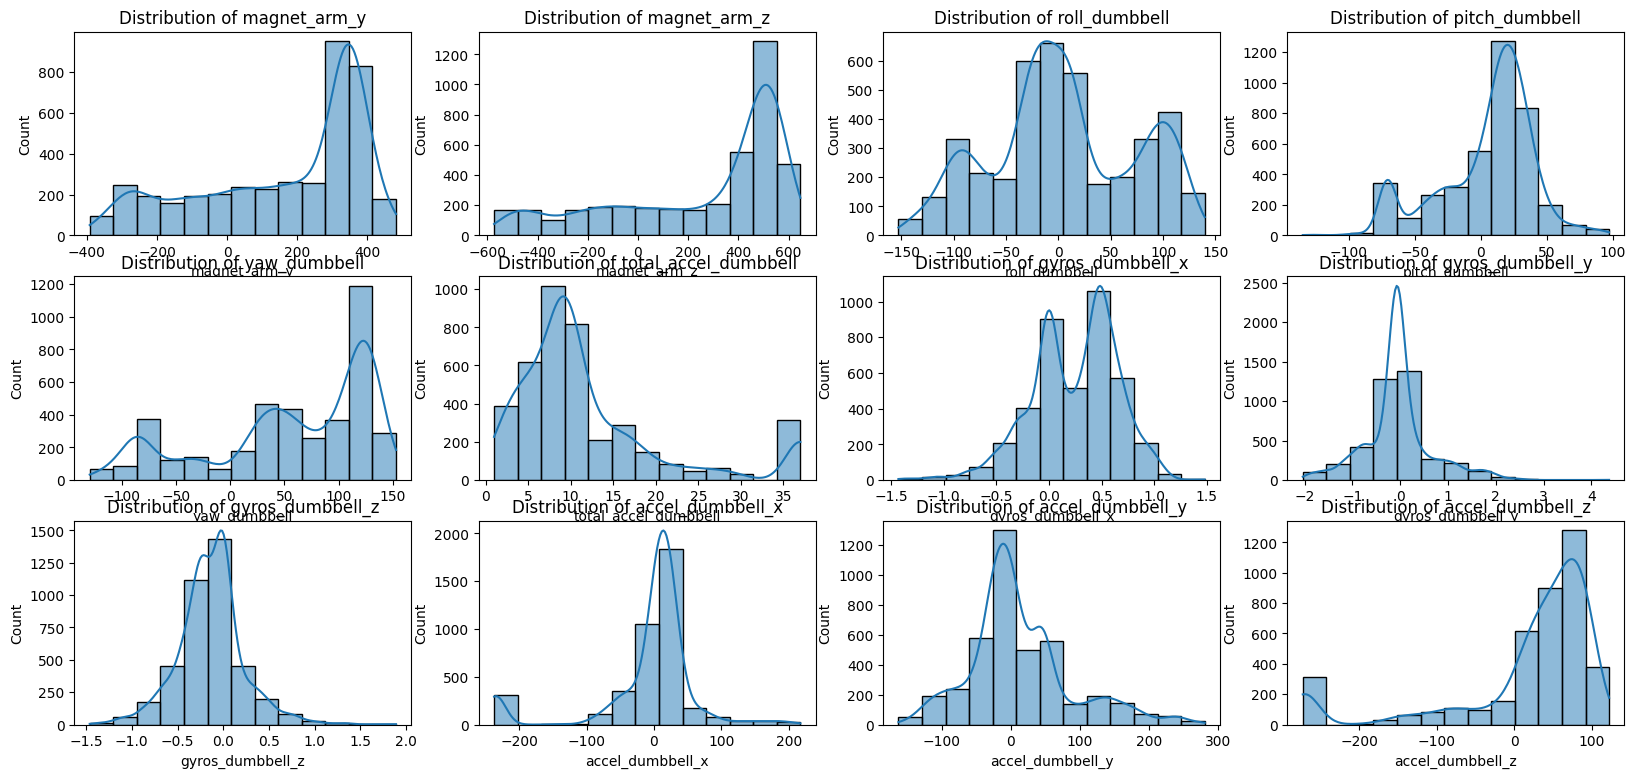

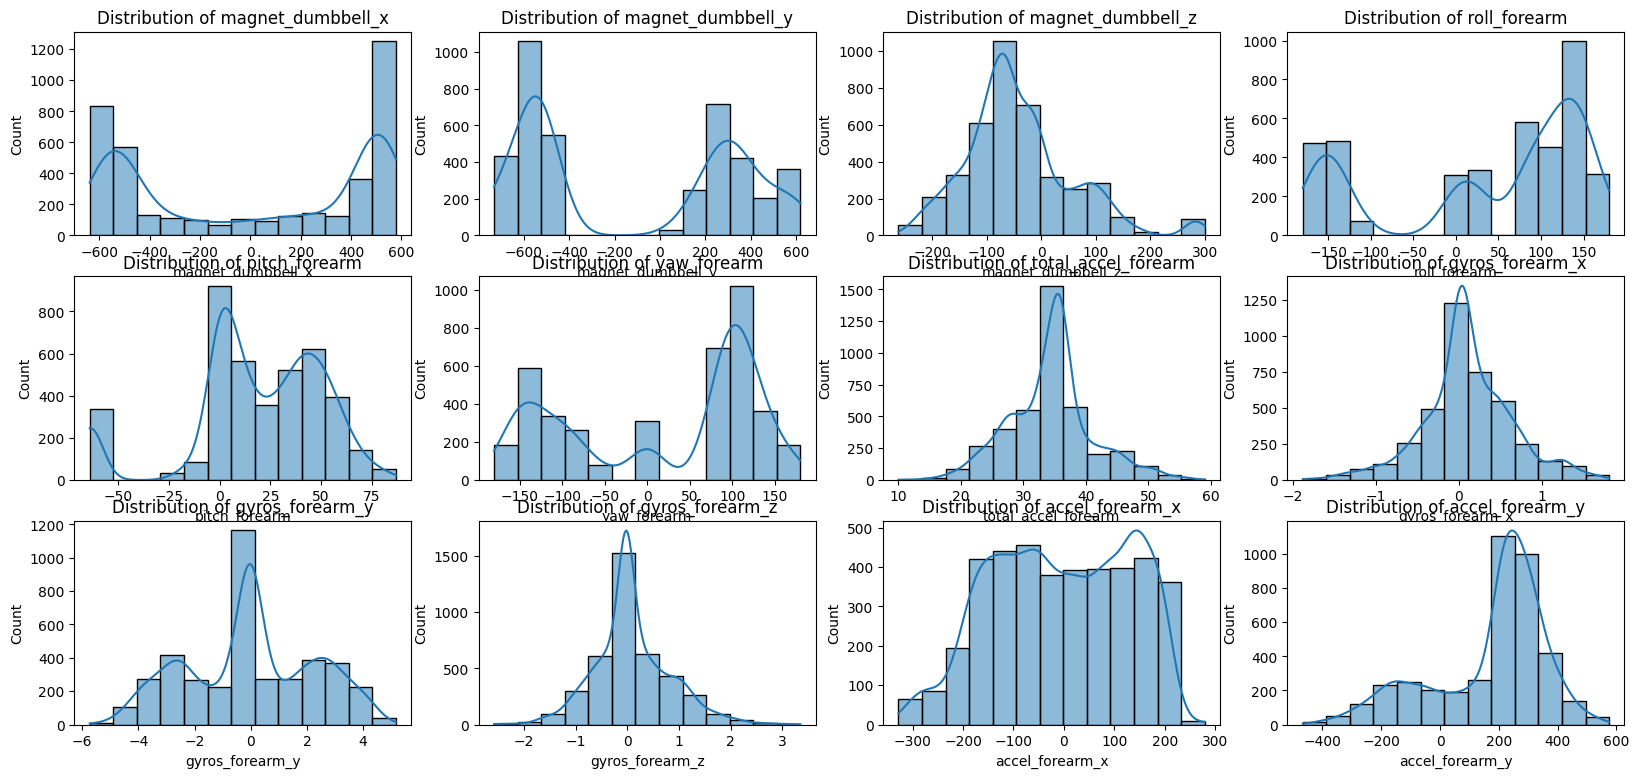

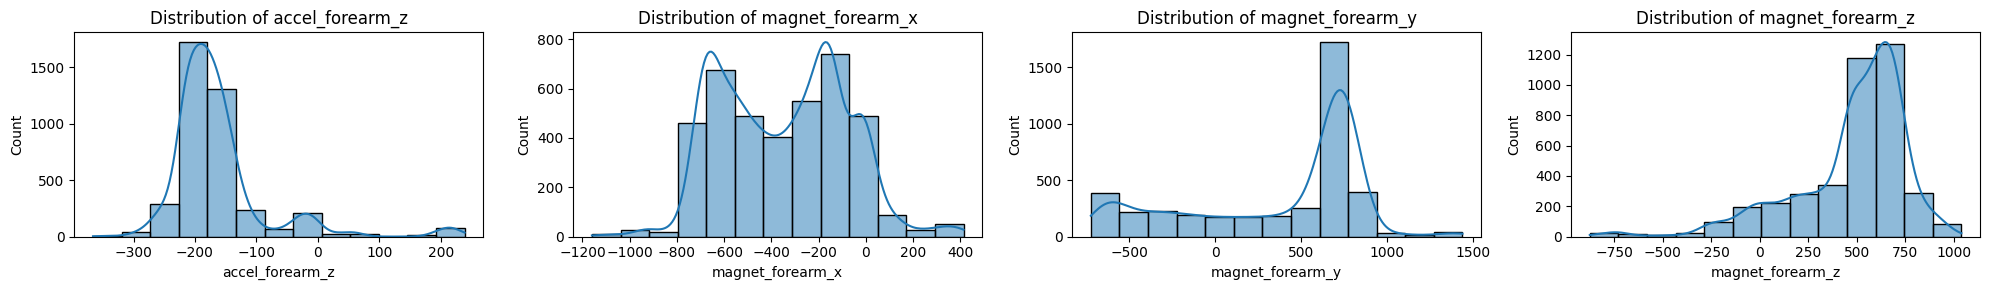

In [14]:
# Histograms for all numerical features
columns = df_dropped.drop(columns="classe").columns
plots_per_fig = 12
n_figs = math.ceil(len(columns) / plots_per_fig)

for fig in range(n_figs):
    start = fig * plots_per_fig
    end = start + plots_per_fig
    subset_cols = columns[start:end]

    rows = math.ceil(len(subset_cols) / 4)  # 4 per row
    plt.figure(figsize=(20, 3 * rows))

    for i, col in enumerate(subset_cols):
        plt.subplot(rows, 4, i + 1)
        sns.histplot(df_dropped[col], kde=True, bins=13)
        plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [15]:
# Compute correlation matrix
corr_matrix = df_dropped.drop(columns="classe").corr()
corr_matrix

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
roll_belt,1.000000,0.174553,0.837180,0.976050,-0.589652,-0.011256,-0.621460,-0.172070,0.935925,-0.991618,...,-0.105378,0.261642,-0.020220,0.068715,0.017287,0.120262,0.208402,-0.062748,0.067604,0.329333
pitch_belt,0.174553,1.000000,-0.213519,0.291728,-0.535035,-0.650049,-0.448457,-0.919020,0.420395,-0.228293,...,-0.262883,-0.226255,-0.116050,-0.190839,0.216923,-0.020605,-0.110958,-0.198303,0.246409,0.038013
yaw_belt,0.837180,-0.213519,1.000000,0.786225,-0.236558,0.262635,-0.390767,0.270886,0.646488,-0.796211,...,0.068456,0.385285,-0.002540,0.115270,-0.112944,0.161877,0.417435,-0.026393,0.034588,0.206761
total_accel_belt,0.976050,0.291728,0.786225,1.000000,-0.610128,-0.114938,-0.652483,-0.285139,0.945764,-0.969904,...,-0.116778,0.256863,-0.057631,0.027123,0.021124,0.128759,0.254876,-0.103304,0.120907,0.298724
gyros_belt_x,-0.589652,-0.535035,-0.236558,-0.610128,1.000000,0.197274,0.585509,0.617549,-0.710379,0.623479,...,0.151549,0.084184,0.063340,0.030989,-0.300603,-0.071956,0.350036,-0.041666,-0.087011,-0.477630
gyros_belt_y,-0.011256,-0.650049,0.262635,-0.114938,0.197274,1.000000,0.402729,0.627647,-0.196368,0.057849,...,0.160382,0.121854,0.087414,0.163747,-0.104667,0.032167,0.031433,0.149447,-0.168780,0.081150
gyros_belt_z,-0.621460,-0.448457,-0.390767,-0.652483,0.585509,0.402729,1.000000,0.437562,-0.686942,0.638551,...,0.138699,-0.087583,0.037204,0.030039,-0.077259,-0.078476,-0.013058,0.121730,-0.125838,-0.254587
accel_belt_x,-0.172070,-0.919020,0.270886,-0.285139,0.617549,0.627647,0.437562,1.000000,-0.444773,0.224008,...,0.295261,0.273058,0.083829,0.153199,-0.253843,0.053900,0.261518,0.129449,-0.177300,-0.140005
accel_belt_y,0.935925,0.420395,0.646488,0.945764,-0.710379,-0.196368,-0.686942,-0.444773,1.000000,-0.944280,...,-0.179211,0.142805,-0.034938,0.027357,0.095417,0.089049,0.080647,-0.092741,0.100655,0.345987
accel_belt_z,-0.991618,-0.228293,-0.796211,-0.969904,0.623479,0.057849,0.638551,0.224008,-0.944280,1.000000,...,0.114663,-0.244711,0.030719,-0.053045,-0.036853,-0.112491,-0.176347,0.063246,-0.066504,-0.321766


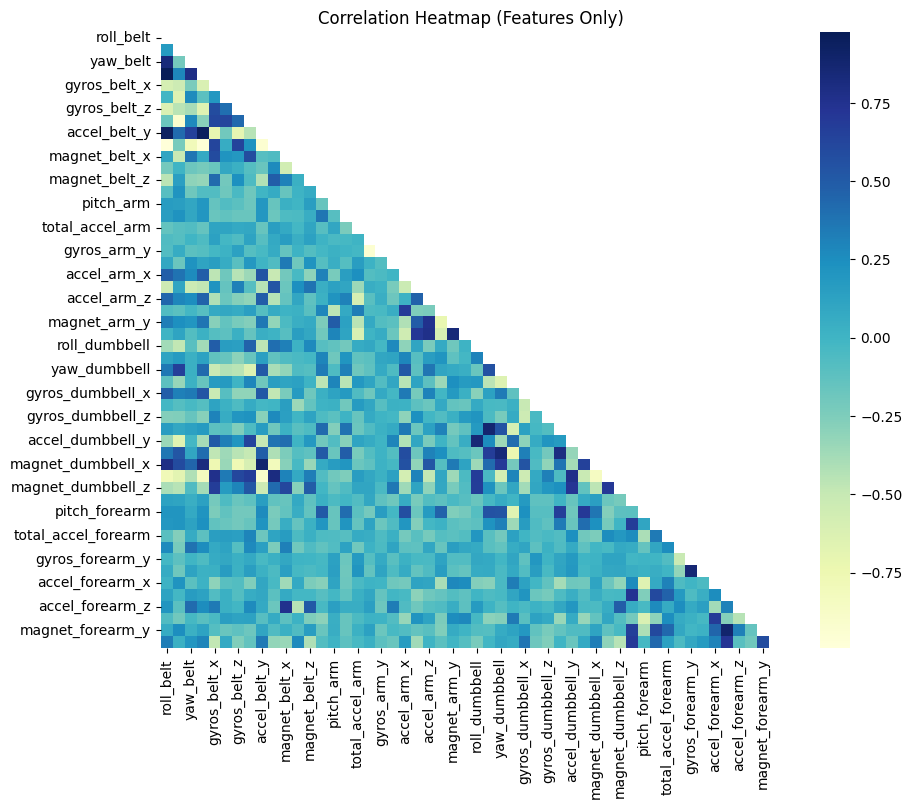

In [16]:
#plot triangle heatmap
# creating mask
mask = np.triu(np.ones_like(corr_matrix))

# plotting a triangle correlation heatmap
plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", mask=mask, fmt=".2f")
plt.title("Correlation Heatmap (Features Only)")
plt.show()

Used ChatGPT to refine ideas about correlated features

OpenAI. (2025b). ChatGPT (July 23 version) [Large language model].https://chatgpt.com/share/68822ff7-4a5c-800f-8b14-6aa931ed7808

There are a few highly correlated features within this dataset. These are the features with correlation grater than or equal to 0.75, although most features fall in the moderate to low correlation range (≤ 0.5). There are several ways to address highly correlated features to reduce multicollinearity:

**Removing Highly Correlated Features**

Removing highly correlated features can simplifie models and reduce redundancy, but there is a risk of losing useful information

**Feature Transformation / Dimensionality Reduction**

Techniques like Principal Component Analysis (PCA) can be used to reduce dimensionality while keeping most variance but, PCA components are less interpretable.

**Regularization Techniques**

Methods such as Lasso (L1) or Ridge (L2) regression will allow the models to learn to down-weight or remove less important features automatically. This option is good for handling correlated features without explicit removal.

**Use Models Less Sensitive to Correlation**

Less sensitive models such as Tree-based models (Random Forest, Gradient Boosting) are generally robust to correlated features. Neural networks can also handle correlated inputs reasonably well.

**Feature Engineering / Domain Knowledge**

Combine correlated features into meaningful new features (e.g., averages, ratios).

**Next Step**

Géron, A.  (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition*. O'Reilly.

Reducing dimensionality causes some infromation loss, Geron recomends first training system on original data and then consider using dimensionality reduction. (Geron, 2022)

## Pre-Processing

**Balancing Training Data**

In [17]:
# Train Test split
X = df_dropped.drop(columns= ['classe'])
labels = df_dropped['classe']

# train_test_split here
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.20,random_state= 42)

Used ChatGPT for further understanding on the approprate use casses of one-hot encoding, scaling, and centering.

OpenAI. (2025a). ChatGPT (July 22 version) [Large language model]. https://chatgpt.com/share/688008be-b13c-800f-8777-77f32c0befe7

**One Hot Encodoing**

Decision Trees, Random Forests, Gradient Boosting, SVM, and most scikit-learn models, will not require one-hot encoding the dependent variable classe.

Neural Networks (e.g., Keras/TensorFlow/PyTorch), will require one-hot encode classe.

**Scaling**

Decision Trees and Random Forests will not require Scaling.

Scaling is recomended for Linear Models, SVM, Neural Networks.

**Centering**

Linear Models, SVM, and Nural Networks will need centering

Decision Trees and Ensemble Trees (Random Forest, Gradient Boosting) will not need centering.

**Best Approach**

Keep an unscaled dataset copy of the raw dataset for reporting or interpretation of trees. Create a scaled + centered version for model trianing.

In [18]:
# Centering and Scaling
scaler = StandardScaler()  # centers to mean=0, scales to variance=1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Balance
sm = SMOTE(random_state=42)
X_train_scaled_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

**Dimensionality reduction**

Principle Component Analysis

In [20]:
# Principle Component Analysis
# Test 1-20 components
n_components = range(1,41)

# analyze the reconstruction error and explained variance
explained_var_list = []
recon_error_list = []

for n in n_components:
  pca = PCA(n_components=n)
  pca.fit(X_train_scaled_bal)
  explained_var_list.append(np.sum(pca.explained_variance_ratio_))

  X_proj = pca.transform(X)
  X_reconstructed = pca.inverse_transform(X_proj)
  mse = mean_squared_error(X, X_reconstructed)
  recon_error_list.append(mse)

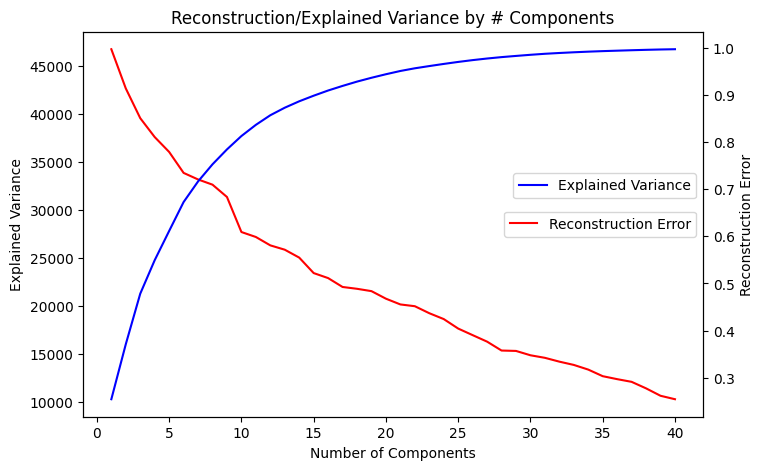

In [21]:
# Form the recunstruction Error here:
rec_error = pd.DataFrame({'n_components': n_components,
'reconst error': recon_error_list,
'explained var ratio': explained_var_list})

# Plot it here:
fig, ax = plt.subplots(figsize =(8,5))
sns.lineplot(data=rec_error, x='n_components', y='reconst error', ax=ax,color='red', label='Reconstruction Error')

# Use twin Axes here:
ax2 = ax.twinx()
sns.lineplot(data=rec_error, x='n_components', y= 'explained var ratio',ax=ax2, color= 'blue', label= 'Explained Variance' )

ax.legend(loc='center right')
ax2.legend(loc='center right', bbox_to_anchor=(1, 0.6))

plt.title('Reconstruction/Explained Variance by # Components')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Explained Variance')
ax2.set_ylabel('Reconstruction Error')
plt.show()

Use the explained variance curve as the main guide.

Explained Variance continues to increase but levels off gradually around 30 components. At 20 components ~90% of the variance is captured. At about 30 components ~95-97% of the varaince is captured.

Reconstruction Error drops rapidly around 5-10 components. The major data structures are captured quickly. Beyond 20 components, reconstruction errror continues to decrease but more slowly.

The two lines intersect at about 5 to 6 components. This is where both components start rapidly imporving together.

The next step is to test 20, 25, 30, and 35 componets for an increase in predictive accuracy. Although reconstruction error is low more components are needed to capture enough detail for accurate class prediction.



In [22]:
components_to_test = [5, 10, 15, 20, 25, 30, 35]
results = []

for n in components_to_test:
    #Apply PCA
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X_train_scaled_bal)

    # Train a Random Forest classifier as a diagnositc tool
    rf = RandomForestClassifier(random_state=42)
    rf_scores = cross_val_score(rf, X_pca, y_train_bal, cv=5, scoring='f1_macro')

    # Gradient Boosting Classifier
    gb = GradientBoostingClassifier(random_state=42)
    gb_scores = cross_val_score(gb, X_pca, y_train_bal, cv=5, scoring='f1_macro')

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn_scores = cross_val_score(knn, X_pca, y_train_bal, cv=5, scoring='f1_macro')

    results.append({
        'Components': n,
        'RF Mean F1 Score': np.mean(rf_scores),
        'RF Std F1 Score': np.std(rf_scores),
        'GB Mean F1 Score': np.mean(gb_scores),
        'GB Std F1 Score': np.std(gb_scores),
        'KNN Mean F1 Score': np.mean(knn_scores),
        'KNN Std F1 Score': np.std(knn_scores)
    })

results_df = pd.DataFrame(results)
results_df

,Components,RF Mean F1 Score,RF Std F1 Score,GB Mean F1 Score,GB Std F1 Score,KNN Mean F1 Score,KNN Std F1 Score
0,5,0.986252,0.002026,0.971728,0.007162,0.984980,0.003827
1,10,0.996385,0.002491,0.989321,0.003006,0.995662,0.001843
2,15,0.998374,0.001053,0.992589,0.002994,0.997830,0.000924
3,20,0.999097,0.000571,0.993128,0.002467,0.998192,0.000991
4,25,0.998735,0.000723,0.996204,0.001328,0.998554,0.001085
5,30,0.999096,0.001400,0.997109,0.001327,0.998373,0.000677
6,35,0.998735,0.000722,0.998374,0.001054,0.998373,0.000677


FRandom Forest and KNN: the models reach near perfect F1 scores by 20 componets with no meaningful improvement. Standard deviation is low.

Gradient Boosting: Improves from 5 to 35 components. Best performance at 35 components. Improvements are small from 20 to 35 components.

20 components gives excellent perfromance across models.

PCA analysis proved that 20 principal components provide optimal performance. PCA will reduce the effects of multicollinearity.

Linear Discriminant Analysis

Check to see if LDA is performs better for a diminsinality reduction technique.

In [23]:
lda_components_to_test = [1, 2, 3, 4]
results_lda = []

for n in lda_components_to_test:
    lda = LDA(n_components=n)
    X_lda = lda.fit_transform(X_train_scaled_bal, y_train_bal)

    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf_scores = cross_val_score(rf, X_lda, y_train_bal, cv=5, scoring='f1_macro')

    # Gradient Boosting
    gb = GradientBoostingClassifier(random_state=42)
    gb_scores = cross_val_score(gb, X_lda, y_train_bal, cv=5, scoring='f1_macro')

    # KNN
    knn = KNeighborsClassifier()
    knn_scores = cross_val_score(knn, X_lda, y_train_bal, cv=5, scoring='f1_macro')

    results_lda.append({
        'Components': n,
        'RF Mean F1 Score': np.mean(rf_scores),
        'RF Std F1 Score': np.std(rf_scores),
        'GB Mean F1 Score': np.mean(gb_scores),
        'GB Std F1 Score': np.std(gb_scores),
        'KNN Mean F1 Score': np.mean(knn_scores),
        'KNN Std F1 Score': np.std(knn_scores)
    })

results_lda_df = pd.DataFrame(results_lda)
results_lda_df

,Components,RF Mean F1 Score,RF Std F1 Score,GB Mean F1 Score,GB Std F1 Score,KNN Mean F1 Score,KNN Std F1 Score
0,1,0.572217,0.009244,0.643825,0.020094,0.603129,0.012720
1,2,0.865615,0.008506,0.866328,0.008630,0.856601,0.007406
2,3,0.949585,0.011275,0.942665,0.007778,0.940695,0.007007
3,4,0.986260,0.003358,0.984072,0.002680,0.987163,0.003589


LDA 4 components:	F1 scores > 0.98 across RF, GB, KNN. PCA needed ~20 components to reach similar performance. LDA with fewer components (1–3)	has steep performance improvement.	PCA gradually improved with more components.

LDA is outperforming PCA on this task — which makes sense! LDA is supervised, it uses class labels to find the axes that best separate classes. LDA will maximum efficiency while keeping excellent performance.

In [24]:
# apply lda to data
lda = LDA(n_components=4)  # no random_state needed here
X_train_lda = lda.fit_transform(X_train_scaled_bal, y_train_bal)
X_test_lda = lda.transform(X_test_scaled)

## Modeling Methods and Validation

### Decision Tree

### Linear Modeling

Used ChatGPT for further understaninding of code and results

OpenAI. (2025d). ChatGPT (July 26 version) [Large language model].https://chatgpt.com/share/6882432c-5d68-800f-bca2-ea2076338187

**SGDClassifier**

*Log Loss*

supports multinomial classification (multi_class='multinomial')

In [25]:
# Log Loss L1 Regularization

#Hyperparameter tuning

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results_l1 = []

for a in alphas:
  l1clf = SGDClassifier(loss = 'log_loss', penalty='l1', alpha=a, random_state= 42 )
  print('Finished training, alpha=%f' % a)
  l1cv = cross_val_score(l1clf, X_train_lda, y_train_bal, cv=5, scoring='f1_macro',n_jobs=-1)
  print('Finished 5-fold CV, alpha=%f' % a)
  results_l1.append({'alpha': a, 'log L1': l1cv.mean()}) # append 'alpha' and 'log L1'
l1_f1 = pd.DataFrame(results_l1)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [26]:
l1_f1

,alpha,log L1
0,0.00001,0.967283
1,0.00010,0.973181
2,0.00100,0.971891
3,0.01000,0.970247
4,0.10000,0.962327
5,1.00000,0.244074
6,10.00000,0.066717
7,100.00000,0.066717
8,1000.00000,0.066717


In [27]:
# Log Loss L2 Regularization

results_l2 = []
for a in alphas:
  l2clf = SGDClassifier(loss = 'log_loss', penalty='l2', alpha=a, random_state= 42 )
  print('Finished training, alpha=%f' % a)
  l2cv = cross_val_score(l2clf, X_train_lda, y_train_bal, cv=5, scoring='f1_macro',n_jobs=-1)
  print('Finished 5-fold CV, alpha=%f' % a)
  results_l2.append({'alpha': a, 'log L2': l2cv.mean()}) # append 'alpha' and 'log L1'
l2_f1 = pd.DataFrame(results_l2)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [28]:
l2_f1

,alpha,log L2
0,0.00001,0.966332
1,0.00010,0.965176
2,0.00100,0.973314
3,0.01000,0.971087
4,0.10000,0.965785
5,1.00000,0.960527
6,10.00000,0.656906
7,100.00000,0.613231
8,1000.00000,0.357708


In [29]:
# Log Loss Elastic Net

# unbalanced data
results_elnet = []
for a in alphas:
  elnetclf = SGDClassifier(loss = 'log_loss', penalty='elasticnet', alpha=a, random_state= 42 )
  print('Finished training, alpha=%f' % a)
  elnetcv = cross_val_score(elnetclf, X_train_lda, y_train_bal, cv=5, scoring='f1_macro',n_jobs=-1)
  print('Finished 5-fold CV, alpha=%f' % a)
  results_elnet.append({'alpha': a, 'log elnet': elnetcv.mean()}) # append 'alpha' and 'log elnet'
elnet_f1 = pd.DataFrame(results_elnet)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [30]:
elnet_f1

,alpha,log elnet
0,0.00001,0.968130
1,0.00010,0.966059
2,0.00100,0.972768
3,0.01000,0.971814
4,0.10000,0.965781
5,1.00000,0.957861
6,10.00000,0.200783
7,100.00000,0.066717
8,1000.00000,0.066717


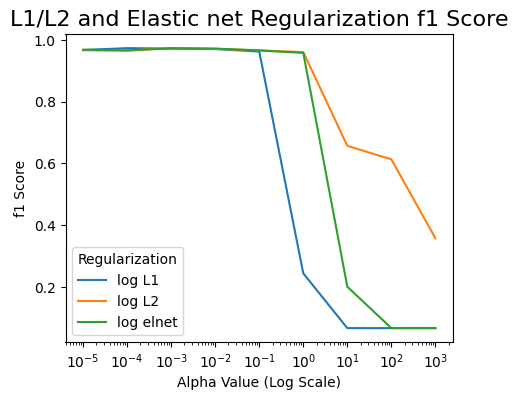

In [31]:
# Create an appropriate plot of L1/L2 and Elastic Net

plt.figure(figsize=(5, 4))
sns.lineplot(x='alpha', y='log L1', data=l1_f1, label='log L1')
sns.lineplot(x='alpha', y='log L2', data=l2_f1, label='log L2')
sns.lineplot(x='alpha', y= 'log elnet', data=elnet_f1, label='log elnet')
plt.xscale('log')
plt.legend(title='Regularization')
plt.title('L1/L2 and Elastic net Regularization f1 Score', size=16)
plt.xlabel('Alpha Value (Log Scale)')
plt.ylabel('f1 Score')
plt.show()

All three penalties start with a high f1 score for small alpha values. The model fits well with minimal regularizatiin. At high alpha values f1 score drops, suggesting that too much regularization hurts the model. L2 has a gradual drop in f1 score as alpha level gets larger and L1 and Elastic net have a faster drop. All penalties perform poorly when alpha is greater than 1. L2 appreas to be more stable in this case.

In [32]:
# Train the best fit log loss lienar model

best_alpha = 0.00001
linear_model_LL = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    alpha=best_alpha,
    class_weight=None,
    random_state=42).fit(X_train_lda, y_train_bal)

linear_model_LL

SGDClassifier(alpha=1e-05, loss='log_loss', random_state=42)

**Perceptron**

In [33]:
# Perceptron with L1 penalty
results_perceptron_l1 = []
for a in alphas:
    clf = SGDClassifier(loss='perceptron', penalty='l1', alpha=a, random_state=42)
    print('Finished training, alpha=%f' % a)
    score = cross_val_score(clf, X_train_lda, y_train_bal, cv=5, scoring='f1_macro', n_jobs=-1)
    print('Finished 5-fold CV, alpha=%f' % a)
    results_perceptron_l1.append({'alpha': a, 'f1_macroperceptron_l1': score.mean()})

perceptron_l1 = pd.DataFrame(results_perceptron_l1)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [34]:
# Perceptron with L2 penalty
results_perceptron_l2 = []

for a in alphas:
    clf = SGDClassifier(loss='perceptron', penalty='l2', alpha=a,random_state=42)
    print('Finished training, alpha=%f' % a)
    cv_score = cross_val_score(clf, X_train_lda, y_train_bal, cv=5,scoring='f1_macro', n_jobs=-1)
    print('Finished 5-fold CV, alpha=%f' % a)
    results_perceptron_l2.append({'alpha': a, 'f1_macroperceptron_l2': cv_score.mean()})

perceptron_l2 = pd.DataFrame(results_perceptron_l2)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [35]:
# merge dataframes
merged = pd.merge(perceptron_l1, perceptron_l2, on='alpha', suffixes=('Perceptron L1', 'Perceptron L2'))
merged

,alpha,f1_macroperceptron_l1,f1_macroperceptron_l2
0,0.00001,0.967871,0.967068
1,0.00010,0.972265,0.960763
2,0.00100,0.971163,0.972966
3,0.01000,0.970262,0.972156
4,0.10000,0.946012,0.973290
5,1.00000,0.201537,0.948923
6,10.00000,0.066717,0.845022
7,100.00000,0.066717,0.386184
8,1000.00000,0.066717,0.356212


Choose alpha = 0.0001 with penalty='l1' as your final Perceptron

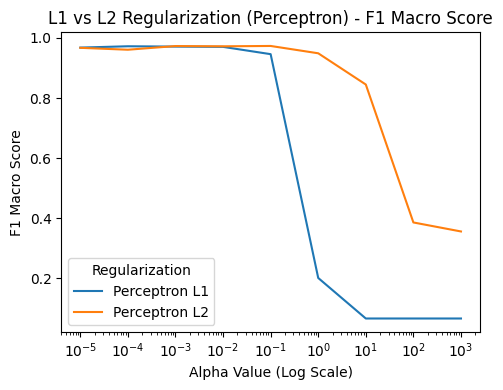

In [36]:
plt.figure(figsize=(5, 4))
sns.lineplot(x='alpha', y='f1_macroperceptron_l1', data=merged, label='Perceptron L1')
sns.lineplot(x='alpha', y='f1_macroperceptron_l2', data=merged, label='Perceptron L2')
plt.xscale('log')
plt.legend(title='Regularization')
plt.title('L1 vs L2 Regularization (Perceptron) - F1 Macro Score')
plt.xlabel('Alpha Value (Log Scale)')
plt.ylabel('F1 Macro Score')
plt.tight_layout()
plt.show()

L1 and L2 perform identically with F1= 1, minimal regularization produces a good classification performance.

L2 outperforms L1 at moderate alpha values (0.1 to 10). L1 drops sharply after 0.1. Too much regularization will penalize weights.

L2 degrades more gracefully than L1 and may be the best choice for regularization.

In [37]:
# Train the best fit perceptron lienar model

best_alpha = 0.0001 # choose a small alpha 0.00001 or 0.0001
linear_model_P = SGDClassifier(
    loss='perceptron',
    penalty='l2',
    alpha=best_alpha,
    class_weight=None,
    random_state=42).fit(X_train_lda, y_train_bal)

linear_model_P

SGDClassifier(loss='perceptron', random_state=42)

### Ensemble Modeling

**Random Forests**

**Gradient Boosting**

In [72]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3, 4]
}

# Initialize model
gb = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb,param_grid=param_grid,
                           cv=5,scoring='f1_weighted',n_jobs=-1
)

# Fit to LDA-transformed data
grid_search.fit(X_train_lda, y_train_bal)

# Display the best combination
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best F1 score: 0.9851610231788921


In [74]:
# Fit the best model from grid search
gbrt = grid_search.best_estimator_

**K-NN**

In [66]:
# List of odd k values
k_vals = list(range(1, 26, 2))

results_knn = []
# loop to test k-vals
for k in k_vals:
  knn = KNeighborsClassifier(n_neighbors=k)

  # Use cross-validation on training data
  scores = cross_val_score(knn, X_train_lda, y_train_bal, cv=5, scoring='f1_macro')

  results_knn.append({
        'k': k,
        'mean_f1_weighted': scores.mean(),
        'std_f1_weighted': scores.std()
    })

In [68]:
# Store results in a DataFrame
knn_results_df = pd.DataFrame(results_knn)
knn_results_df

,k,mean_f1_weighted,std_f1_weighted
0,1,0.988429,0.002245
1,3,0.988974,0.002892
2,5,0.987162,0.003592
3,7,0.986618,0.002010
4,9,0.984986,0.002107
5,11,0.984806,0.002170
6,13,0.983717,0.002749
7,15,0.983718,0.003490
8,17,0.983166,0.003701
9,19,0.982438,0.003704


The best weighted F1 scores occur at k= 3 where mean weight is ~0.989 and std weight is ~ 0.0029

In [69]:
# Fit the Knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_lda,y_train_bal)

KNeighborsClassifier(n_neighbors=3)

### Neural Network

### Support Vector Machines

### Unsupervised Learning

**KMeans**

In [57]:
# Choose the best number of clusters usign silhouette score
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_train_lda)
  score = silhouette_score(X_train_lda, kmeans.labels_)
  print(f"k={k}, Silhouette Score: {score:.3f}")

k=2, Silhouette Score: 0.788
k=3, Silhouette Score: 0.732
k=4, Silhouette Score: 0.508
k=5, Silhouette Score: 0.450
k=6, Silhouette Score: 0.501
k=7, Silhouette Score: 0.503
k=8, Silhouette Score: 0.478
k=9, Silhouette Score: 0.438


~1: Data points are well-clustered and separated.

0: Overlapping clusters.

Negative: Samples are assigned to the wrong clusters.

This dataset has 5 known classes (A-E).When applying unsupervised K-Means clustering, the highest silhouette score (0.788) was achieved with k=2, which is significantly lower than the expected 5 clusters. This suggests that the dataset does not naturally form five well-separated clusters in feature space without supervision. The high class imbalance (e.g., Class E and A having many more samples than Class C and D) may cause the clustering algorithm to group data primarily based on majority class patterns, overshadowing minority class distinctions. Additionally, overlapping feature distributions between classes (e.g., A vs. B, C being underrepresented) reduce separability, leading to fewer distinct clusters than labeled categories.

Use k = 5 to test whether unsupervised clustering can recover the known 5 exercise classes. This is the goal of this project.

Use k = 2 to show the optimal natural cluster count found in k-means

In [58]:
# Fit K-means model
# k = 5
kmeans = KMeans(n_clusters=5, random_state= 42)
kmeans.fit(X_train_lda)

KMeans(n_clusters=5, random_state=42)

## Performance Metrics

### Decision Tree

### Linear Modeling

**Log Loss**

In [41]:
# Predict class labels
y_pred_lin_LL = linear_model_LL.predict(X_test_lda)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lin_LL))
print(classification_report(y_test, y_pred_lin_LL))
print(confusion_matrix(y_test, y_pred_lin_LL))

Balanced Accuracy: 0.9562814885154263
              precision    recall  f1-score   support

           A       0.93      0.93      0.93       258
           B       0.91      0.90      0.91       176
           C       0.84      0.95      0.89        22
           D       1.00      1.00      1.00        54
           E       1.00      0.99      1.00       295

    accuracy                           0.95       805
   macro avg       0.94      0.96      0.95       805
weighted avg       0.95      0.95      0.95       805

[[240  15   3   0   0]
 [ 16 159   1   0   0]
 [  1   0  21   0   0]
 [  0   0   0  54   0]
 [  2   0   0   0 293]]


Balanced accuracy is 0.956, which is excellent performance for a 5-class dataset. the model is predicting well across classes and accounting for imbalance. Weighted accuracy is ~95% overall. The model is predicting correctly for most samples.

Class predictions

A and B: slightly lower recall

C: minority class, Model correctly identifits most smples althoguh a few false positives remain. F1 score is strong overall.  Class C remains a challenge because of its small sample size and overlap with A/B.

D: strong results

E: strong results


**Perceptron**

In [42]:
# Predict class labels
y_pred_lin_P = linear_model_P.predict(X_test_lda)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lin_P))
print(classification_report(y_test, y_pred_lin_P))
print(confusion_matrix(y_test, y_pred_lin_P))

Balanced Accuracy: 0.9431922695619976
              precision    recall  f1-score   support

           A       0.89      0.91      0.90       258
           B       0.90      0.86      0.88       176
           C       0.78      0.95      0.86        22
           D       1.00      1.00      1.00        54
           E       1.00      0.98      0.99       295

    accuracy                           0.94       805
   macro avg       0.91      0.94      0.93       805
weighted avg       0.94      0.94      0.94       805

[[236  17   5   0   0]
 [ 23 152   1   0   0]
 [  1   0  21   0   0]
 [  0   0   0  54   0]
 [  5   0   0   0 290]]


THe perceptron model is performing exceptionally well, and is on par with or slightly better than the tuned logistic regression model.

Balanced Accuracy: 0.957 — strong

Macro F1: 0.96 - strong

Class C: Performing well

### Ensemble Modeling

**Gradient Boosting**

In [75]:
# Predict on test set
y_pred_gb = gbrt.predict(X_test_lda)

# Evaluate
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Balanced Accuracy: 0.9636722566620083
              precision    recall  f1-score   support

           A       0.97      0.97      0.97       258
           B       0.95      0.94      0.95       176
           C       0.91      0.91      0.91        22
           D       0.96      1.00      0.98        54
           E       1.00      0.99      1.00       295

    accuracy                           0.97       805
   macro avg       0.96      0.96      0.96       805
weighted avg       0.97      0.97      0.97       805

[[251   7   0   0   0]
 [  8 166   2   0   0]
 [  1   1  20   0   0]
 [  0   0   0  54   0]
 [  0   0   0   2 293]]


**K Nearest Neighbors**

In [70]:
y_pred_knn = knn.predict(X_test_lda)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Balanced Accuracy: 0.9743050728013284
              precision    recall  f1-score   support

           A       0.98      0.96      0.97       258
           B       0.94      0.97      0.95       176
           C       1.00      0.95      0.98        22
           D       0.95      1.00      0.97        54
           E       1.00      0.99      0.99       295

    accuracy                           0.98       805
   macro avg       0.97      0.97      0.97       805
weighted avg       0.98      0.98      0.98       805

[[248  10   0   0   0]
 [  6 170   0   0   0]
 [  0   1  21   0   0]
 [  0   0   0  54   0]
 [  0   0   0   3 292]]


Balanced accuracy is excelelnt for a 5-class classification task.

F1 for all classes is strong

Confusion matric shows a bit of misclassification with in A/B and E

### Support Vector Machines

### Neural Networks

### Confidence Intervals

In [84]:
# Used ChatGPT to create definition
# OpenAI. (2025d). ChatGPT (July 31 version) [Large language model].
# https://chatgpt.com/share/688c63f9-08dc-800f-be04-8c4ed9e9fc29
def compute_f1_macro_ci(model, X, y, cv=5, alpha=0.05):
    """
    Computes F1 macro mean, std, and confidence interval for a model using cross-validation.

    Parameters:
        model: the classifier (already configured)
        X: features
        y: target labels
        cv: number of cross-validation folds
        alpha: significance level (default 0.05 for 95% CI)

    Returns:
        dict with mean, std, lower_ci, upper_ci
    """
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
    mean_f1 = np.mean(scores)
    sem = stats.sem(scores)
    ci_lower, ci_upper = stats.t.interval(1 - alpha, df=len(scores)-1, loc=mean_f1, scale=sem)

    return {
        'mean_f1_macro': mean_f1,
        '95% CI Lower': ci_lower,
        '95% CI Upper': ci_upper
    }


In [89]:
# List the names models used for analysis
model_names = [
    "Logistic Regression (Log Loss)",
    "Perceptron",
    "Gradient Boosting",
    "KNN"
]

# List the models used for analysis
models = [
    linear_model_LL,
    linear_model_P,
    gbrt,
    knn
]
results_cv = []

for name,m in zip(model_names, models):
    result = compute_f1_macro_ci(m, X_train_lda, y_train_bal, cv=5, alpha=0.05)
    result["model_name"] = name
    results_cv.append(result)

Model 1 - Mean F1: 0.9663, 95% CI: [0.9605, 0.9721]
Model 2 - Mean F1: 0.9608, 95% CI: [0.9485, 0.9730]
Model 3 - Mean F1: 0.9852, 95% CI: [0.9819, 0.9884]
Model 4 - Mean F1: 0.9890, 95% CI: [0.9850, 0.9930]


In [90]:
# Show results
for res in results_cv:
    print(f"{res['model_name']} - Mean F1: {res['mean_f1_macro']:.4f}, 95% CI: [{res['95% CI Lower']:.4f}, {res['95% CI Upper']:.4f}]")

Logistic Regression (Log Loss) - Mean F1: 0.9663, 95% CI: [0.9605, 0.9721]
Perceptron - Mean F1: 0.9608, 95% CI: [0.9485, 0.9730]
Gradient Boosting - Mean F1: 0.9852, 95% CI: [0.9819, 0.9884]
KNN - Mean F1: 0.9890, 95% CI: [0.9850, 0.9930]


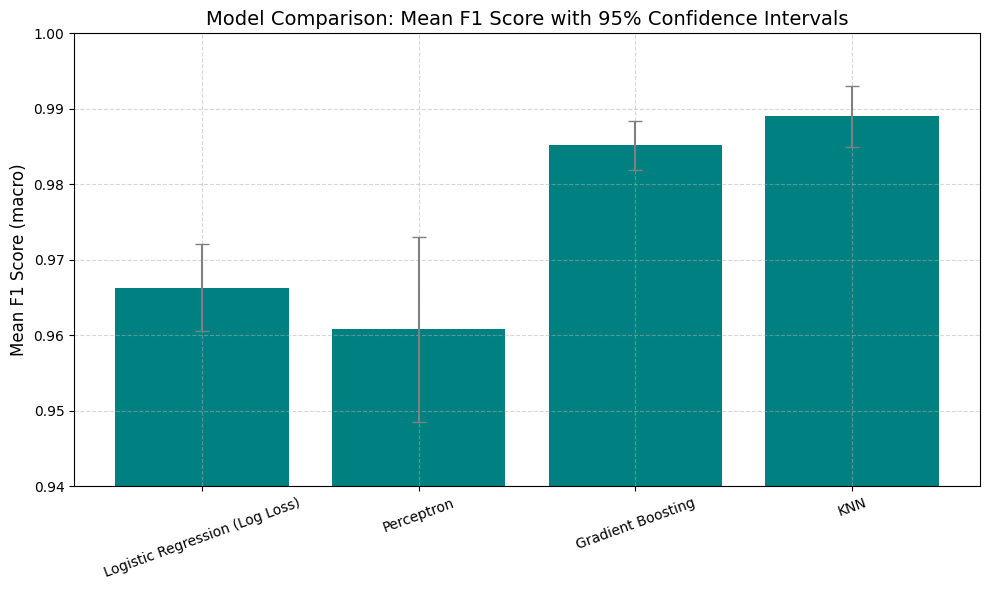

In [93]:
# Plot CI

# Define model results
mean_f1_scores = [0.9663, 0.9608, 0.9852, 0.9890]
ci_lower = [0.9605, 0.9485, 0.9819, 0.9850]
ci_upper = [0.9721, 0.9730, 0.9884, 0.9930]

# Calculate error bars
error_lower = [m - l for m, l in zip(mean_f1_scores, ci_lower)]
error_upper = [u - m for m, u in zip(mean_f1_scores, ci_upper)]
error = [error_lower, error_upper]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_f1_scores, yerr=[error_lower, error_upper], capsize=5, color='teal', ecolor='gray')
plt.title("Model Comparison: Mean F1 Score with 95% Confidence Intervals", fontsize=14)
plt.ylabel("Mean F1 Score (macro)", fontsize=12)
plt.ylim(0.94, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Based ont he results, KNN and GB are the top perfroming models. These models are close in mean but their CIs differ.

KNN has a higher mean F1 score and wider CI, whike GB has a lower mean and narrower CI. Performance may vary more on KNN than GB. GB is more stable.  

### ROC AUC

Check the ROC curve of the top performing model and see how they classify each classe

In [99]:
# Binarize true labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test) #matix with shape (n_samples,5)

**KNN**

In [116]:
# predict probabilities for the top models
# For KNN
y_scores_knn = knn.predict_proba(X_test_lda)

In [117]:
# Binarize the labels: Class A vs. Not A
y_test_bin = label_binarize(y_test, classes=['A', 'B', 'C', 'D', 'E'])

# Predict probabilities for each class
y_proba_knn = knn.predict_proba(X_test_lda)

# Use probabilities for classes(index 0)
y_score_A = y_proba_knn[:, 0]
y_score_B = y_proba_knn[:, 1]
y_score_C = y_proba_knn[:, 2]
y_score_D = y_proba_knn[:, 3]
y_score_E = y_proba_knn[:, 4]

In [119]:
# Compute ROC curve for KNN
fpr_knn_A, tpr_knn_A, thresholds_knn_A = roc_curve(y_test_bin[:, 0], y_score_A)
fpr_knn_B, tpr_knn_B, thresholds_knn_B = roc_curve(y_test_bin[:, 1], y_score_B)
fpr_knn_C, tpr_knn_C, thresholds_knn_C = roc_curve(y_test_bin[:, 2], y_score_C)
fpr_knn_D, tpr_knn_D, thresholds_knn_D = roc_curve(y_test_bin[:, 3], y_score_D)
fpr_knn_E, tpr_knn_E, thresholds_knn_E = roc_curve(y_test_bin[:, 4], y_score_E)

# Compute AUC Socre
roc_auc_knn_A = auc(fpr_knn_A, tpr_knn_A)
roc_auc_knn_B = auc(fpr_knn_B, tpr_knn_B)
roc_auc_knn_C = auc(fpr_knn_C, tpr_knn_C)
roc_auc_knn_D = auc(fpr_knn_D, tpr_knn_D)
roc_auc_knn_E = auc(fpr_knn_E, tpr_knn_E)

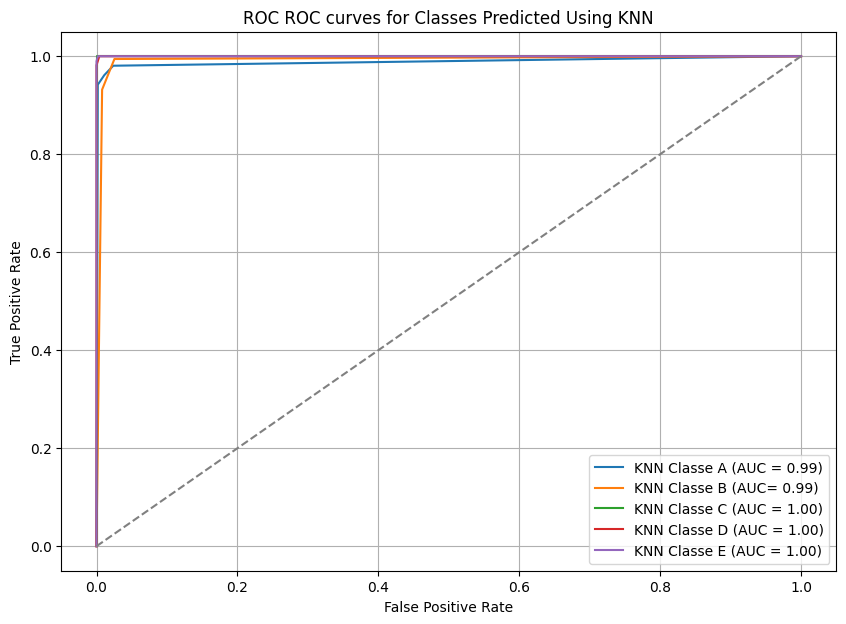

In [120]:
#Plot ROC curves for classes predicted by knn
plt.figure(figsize=(10, 7))
plt.plot(fpr_knn_A, tpr_knn_A, label=f"KNN Classe A (AUC = {roc_auc_knn_A:.2f})")
plt.plot(fpr_knn_B, tpr_knn_B, label=f"KNN Classe B (AUC= {roc_auc_knn_B:.2f})")
plt.plot(fpr_knn_C, tpr_knn_C, label=f"KNN Classe C (AUC = {roc_auc_knn_C:.2f})")
plt.plot(fpr_knn_D, tpr_knn_D, label=f"KNN Classe D (AUC = {roc_auc_knn_D:.2f})")
plt.plot(fpr_knn_E, tpr_knn_E, label=f"KNN Classe E (AUC = {roc_auc_knn_E:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ROC curves for Classes Predicted Using KNN')
plt.legend()
plt.grid(True)
plt.show()

Strong results, the KNN model is doing a good job at distinguishing each class form the rest.

**Gradient Boost**

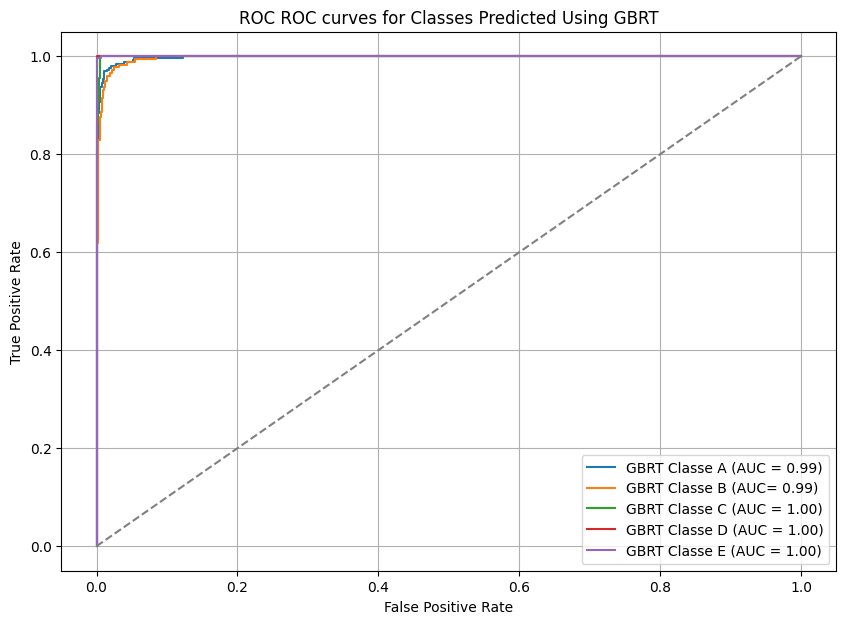

In [121]:
# For Gradient Boosting
y_scores_gb = gbrt.predict_proba(X_test_lda)

# Predict probabilities for each class
y_proba_gbrt = gbrt.predict_proba(X_test_lda)

# Use probabilities for classes(index 0)
y_score_A = y_proba_gbrt[:, 0]
y_score_B = y_proba_gbrt[:, 1]
y_score_C = y_proba_gbrt[:, 2]
y_score_D = y_proba_gbrt[:, 3]
y_score_E = y_proba_gbrt[:, 4]

# Compute ROC curve for gbrt
fpr_gbrt_A, tpr_gbrt_A, thresholds_gbrt_A = roc_curve(y_test_bin[:, 0], y_score_A)
fpr_gbrt_B, tpr_gbrt_B, thresholds_gbrt_B = roc_curve(y_test_bin[:, 1], y_score_B)
fpr_gbrt_C, tpr_gbrt_C, thresholds_gbrt_C = roc_curve(y_test_bin[:, 2], y_score_C)
fpr_gbrt_D, tpr_gbrt_D, thresholds_gbrt_D = roc_curve(y_test_bin[:, 3], y_score_D)
fpr_gbrt_E, tpr_gbrt_E, thresholds_gbrt_E = roc_curve(y_test_bin[:, 4], y_score_E)

# Compute AUC Socre
roc_auc_gbrt_A = auc(fpr_gbrt_A, tpr_gbrt_A)
roc_auc_gbrt_B = auc(fpr_gbrt_B, tpr_gbrt_B)
roc_auc_gbrt_C = auc(fpr_gbrt_C, tpr_gbrt_C)
roc_auc_gbrt_D = auc(fpr_gbrt_D, tpr_gbrt_D)
roc_auc_gbrt_E = auc(fpr_gbrt_E, tpr_gbrt_E)

#Plot ROC curves for classes predicted by knn
plt.figure(figsize=(10, 7))
plt.plot(fpr_gbrt_A, tpr_gbrt_A, label=f"GBRT Classe A (AUC = {roc_auc_knn_A:.2f})")
plt.plot(fpr_gbrt_B, tpr_gbrt_B,label=f"GBRT Classe B (AUC= {roc_auc_knn_B:.2f})")
plt.plot(fpr_gbrt_C, tpr_gbrt_C, label=f"GBRT Classe C (AUC = {roc_auc_knn_C:.2f})")
plt.plot(fpr_gbrt_D, tpr_gbrt_D, label=f"GBRT Classe D (AUC = {roc_auc_knn_D:.2f})")
plt.plot(fpr_gbrt_E, tpr_gbrt_E, label=f"GBRT Classe E (AUC = {roc_auc_knn_E:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ROC curves for Classes Predicted Using GBRT')
plt.legend()
plt.grid(True)
plt.show()

KNN and GBRT yield near perfect results in AUC scores. LDA-transformed features are highly separabel using these two models. Class boundaries are vary clear and there is excellent performance across all classes. ROC metrics are coming from the test set, thus results reflect generalization.

### Unsupervised Learning
**K-Means**


In [59]:
# Predict class labels
y_kmeans = kmeans.predict(X_test_lda) # train K-Means model and assign cluster lables to each point

In [60]:
print("ARI:", adjusted_rand_score(y_test, y_kmeans))

ARI: 0.5116023940614786


ARI is the Adjusted Rand Index. It looks at the agreement in parwise groupign not by lable names.  

ARI = 1 is a perfect match to true labels

ARI = 0.0 is a random clsiter assignment

ARI < 0.0 is worse than random clusteirng

In this case K-Means clustering solution shows moderate alignment with the actual classes (A–E). It is not perfectly separating the 5 classes and there may be overlap in feature space.

t-SNE Plot of K-means clustering

In [61]:
# cluster labels assigned by the unsupervised K-Means algorithm
labels = kmeans.labels_

In [62]:
# Fit transform the no missing data
tsne = TSNE(n_components=2, perplexity=30, n_iter= 1000, random_state=42)
tsne_embd = tsne.fit_transform(X_train_lda)

In [63]:
# Create a DataFrame for plotting
tsne_df = pd.DataFrame(tsne_embd, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = labels    # Correctly assign predicted clusters
tsne_df['TrueLabel'] = y_train_bal.reset_index(drop=True)  # For comparison

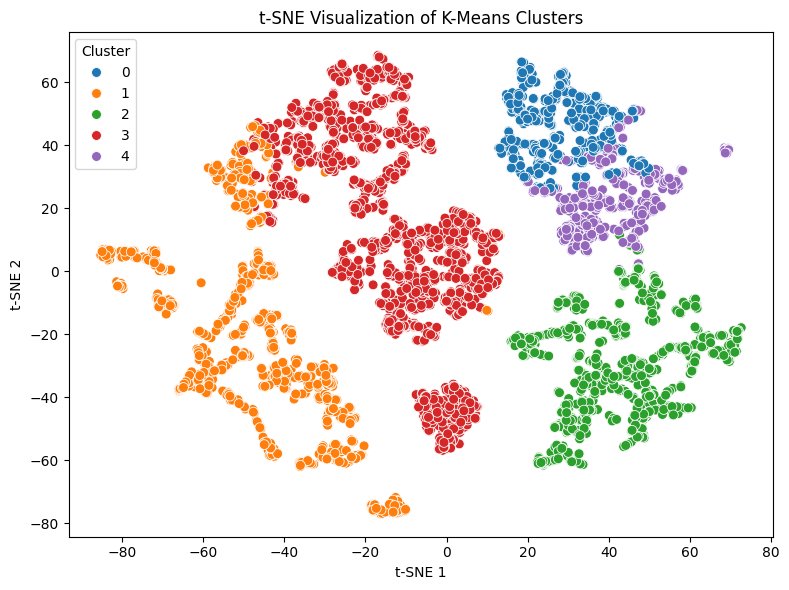

In [64]:
# Plot t-SNE with K-Means clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', s=50)
plt.title("t-SNE Visualization of K-Means Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

5 clearly defined clusters with little overlap. Clusters are well separated suggesting that the unsupervised K-Means is findng data structures.

Text(0.5, 1.0, 't-SNE Visualization of True Labels (LDA Data)')

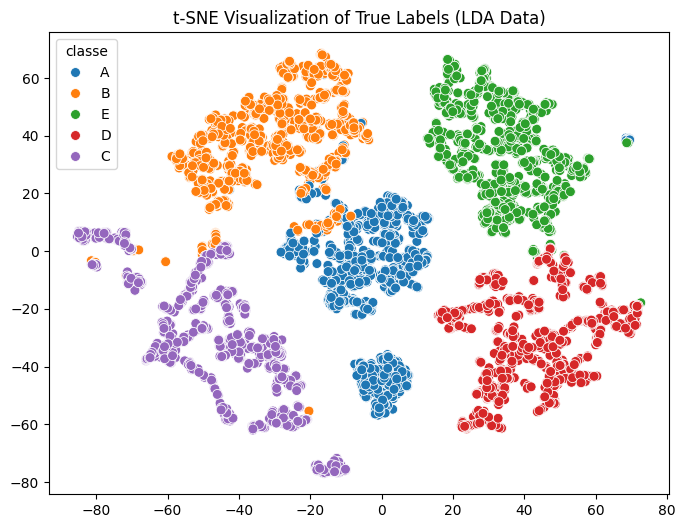

In [65]:
# Compare to true labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_embd[:,0], y=tsne_embd[:,1], hue=y_train_bal, palette='tab10', s=50)
plt.title("t-SNE Visualization of True Labels (LDA Data)")

Clusters post LDA, prior to modeling. This is how well LDA separates the known classes before any classifier is applied.

In this case classes are well separated. There are some overlaps but clear boundries for the most part. yes

## Modeling Results and Findings